
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> TMDB 5000 Movie Dataset is a movie record dataset that contains about 10,000 movies collected from The Movie Database (TMDb). It include enries like homepage, id, original_title, overview, popularity, production_companies, production_countries, release_date, tagline, vote_average, ..etc.


### Question(s) for Analysis
>Questions: 
1. Which genre is the most popular in the movie industry in the dataset? 
2. What is the movie with the highest revenue? and what is the movie with the lowest revenue?
3. What is the genre with highest revenue?
4. What is the number of movies per each genre?
5. What is the relationship between average budget versus average revenue per each genre?

In [120]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('tmdb-movies.csv')  
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [157]:
df.nunique()

id                10731
popularity        10684
budget              553
revenue            4698
original_title    10439
cast              10665
director           5018
runtime             243
genres               20
release_date       5872
release_year         56
budget_adj         2603
revenue_adj        4835
dtype: int64

In [121]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [123]:
df.shape

(10866, 21)

In [124]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [126]:
#dropping entries that I will not need to use.
df.drop(['imdb_id', 'homepage', 'overview', 'keywords', 'production_companies', 'tagline', 'vote_count', 'vote_average'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [127]:
sum(df.duplicated())
# drop duplicates which is 1 in this case
df.drop_duplicates(inplace=True)

In [128]:
# changing the datatype of the release_date entry to datetime64.
df['release_date'] = pd.to_datetime(df['release_date'])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10789 non-null  object        
 6   director        10821 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
 11  budget_adj      10865 non-null  float64       
 12  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.2+ MB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

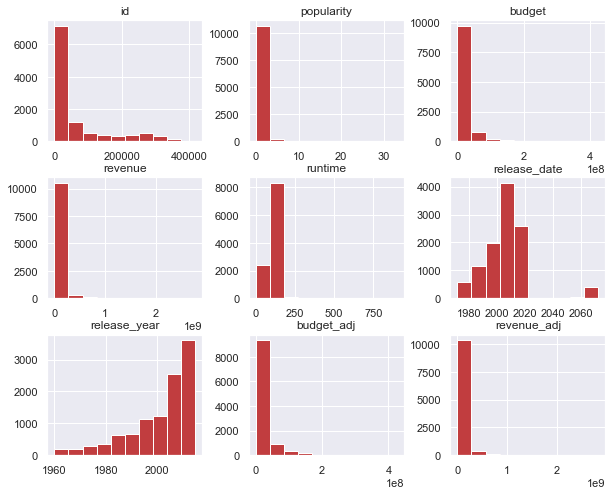

In [130]:
#plot histogram
df.hist(figsize=(10,8))

In [131]:
#checking for null values in the dataset
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [132]:
#dropping null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10731 non-null  int64         
 1   popularity      10731 non-null  float64       
 2   budget          10731 non-null  int64         
 3   revenue         10731 non-null  int64         
 4   original_title  10731 non-null  object        
 5   cast            10731 non-null  object        
 6   director        10731 non-null  object        
 7   runtime         10731 non-null  int64         
 8   genres          10731 non-null  object        
 9   release_date    10731 non-null  datetime64[ns]
 10  release_year    10731 non-null  int64         
 11  budget_adj      10731 non-null  float64       
 12  revenue_adj     10731 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.1+ MB


In [133]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09


In [138]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

<a id='eda'></a>
## Exploratory Data Analysis


> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genre is the most popular in the movie industry in the dataset?)

In [141]:
df_genre = df
df_genre['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [142]:
df_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2015-03-18,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,2015-12-15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,2015-04-01,2015,1.747999e+08,1.385749e+09


In [144]:
df_genre.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [158]:
df_genre.shape

(10731, 13)

As shown there is 10731 rows left in this Dataframe

In [146]:
#creating a new dataframe for the popularity of each genre to plot them in a bar plot in the next steps.
df_gener_popularity=df_genre.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_gener_popularity

,genres,popularity
9,Foreign,0.178917
5,Documentary,0.184773
16,TV Movie,0.245873
12,Music,0.462125
11,Horror,0.468638
3,Comedy,0.538260
6,Drama,0.554173
13,Mystery,0.596896
17,Thriller,0.673381
19,Western,0.690646


In [147]:
gen=df_gener_popularity['genres']
pop=df_gener_popularity['popularity']

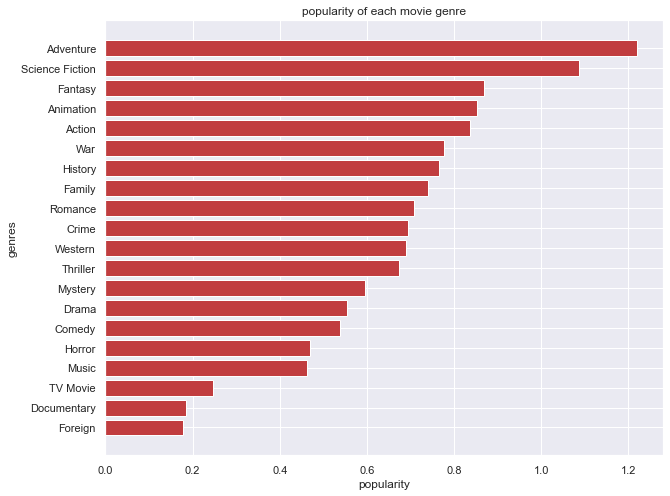

In [148]:
# ploting bar plot that shows that the Adventure genre has the highest popularity and Foreign has the lowest popularity. 
fig,ax = plt.subplots(figsize=(10,8))
plt.barh(gen,pop,label='popularity')
plt.xlabel('popularity')
plt.ylabel('genres')
plt.title('popularity of each movie genre')
plt.show()

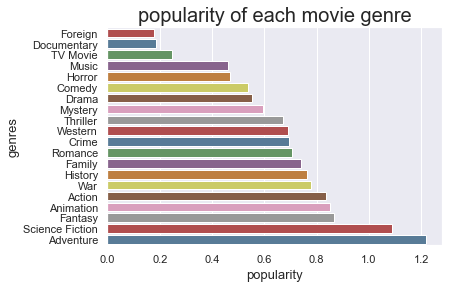

In [149]:
x=gen
y=pop
#using seaborn package to show the plot in another appearence. 
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("popularity of each movie genre",fontsize = 20)
ax.set_xlabel("popularity",fontsize = 13)
ax.set_ylabel("genres",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 2  (What is the movie with the highest revenue? and what is the movie with the lowest revenue?)

In [150]:
# creating a function to indicate the lowest and highest movie in terms of another variable such as revenue or budget,.. etc.
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie that has highest "+ x + ": ",df['original_title'][high_index])
    print("Movie that has lowest "+ x + ": ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

In [151]:
find_minmax('revenue')

Movie that has highest revenue:  Avatar
Movie that has lowest revenue:  Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action,Thriller
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


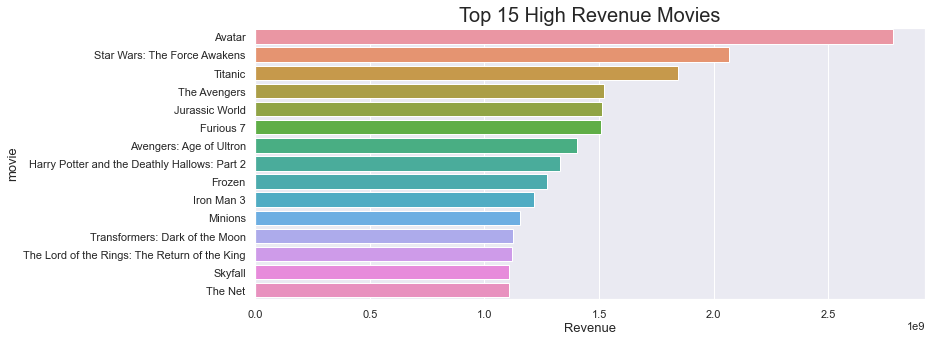

In [152]:
#top 15 movies with highest revenue.
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#top 15 movies with highest revenue.
x = list(data[:15])
y = list(info['revenue'][:15])

#plotting. 
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 15 High Revenue Movies",fontsize = 20)
ax.set_xlabel("Revenue",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)

sns.set_style("darkgrid")

The data plot shows that Avatar is the movie with the highest revenue in this dataset, then Star Wars: The Force Awakens comes after it and the 15th highest revenue movie is The Net.

### Research Question 3  (What is the genre with the highest revenue? and what is the genre with the lowest revenue?)

Text(0, 0.5, 'revenue')

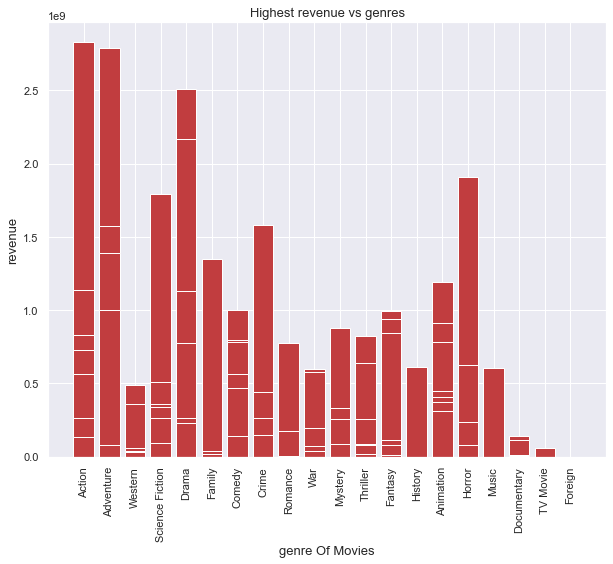

In [159]:
x=df_genre["genres"]
y=df_genre["revenue_adj"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.title("Highest revenue vs genres",fontsize=13)
plt.xlabel('genre Of Movies',fontsize=13)
plt.ylabel("revenue",fontsize= 13)


The previous plot shows that Action movies are the movies with the highest revenue and TV movies are the movies with the lowest revenue. 

### Research Question 4  (What is the number of movies per each genre?)

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 1.0, 'Number Movie Releases by Genres')]

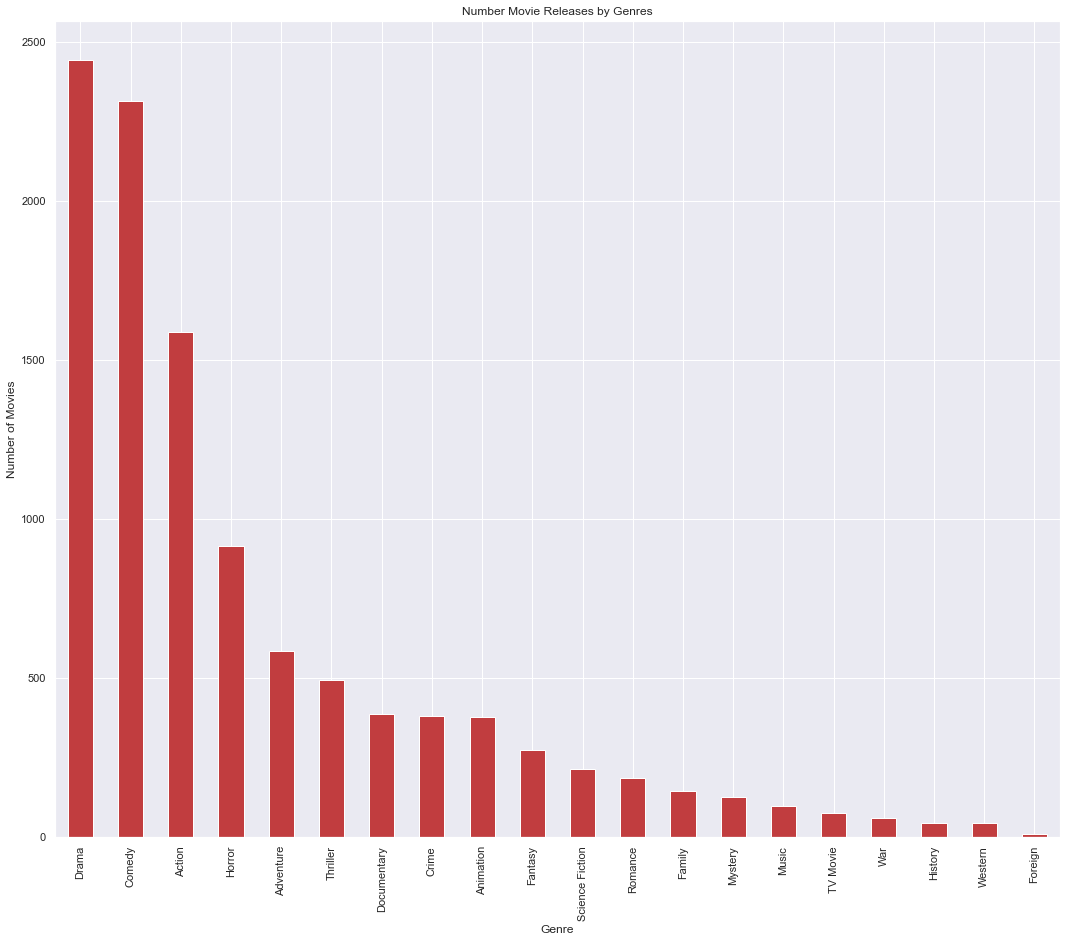

In [154]:
sns.set_style('darkgrid')

# ploting
fig, ax = plt.subplots(figsize=(18,15))
sns.set_palette("Set1", 20, .65)

df_genre.groupby(['genres']).count()['id'].sort_values(ascending=False).plot(kind="bar",  ax=ax);
ax.set(xlabel='Genre', ylabel='Number of Movies', title = 'Number Movie Releases by Genres')

The previous plot shows that Drama genre has the highest number of movies and Foreign genre has the lowest number of movies. 

### Research Question 5  (What is the relationship between average budget versus average revenue per each genre?)

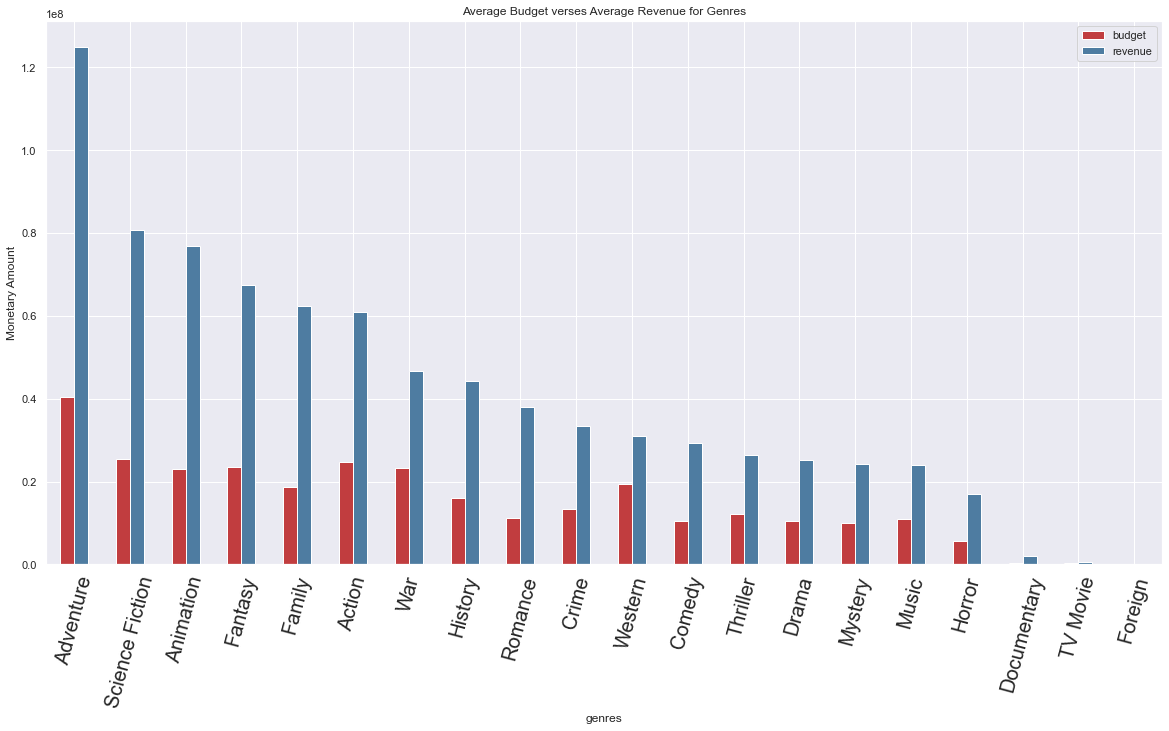

In [155]:
# average budget and revenue of each genres' movies

f,ax=plt.subplots(figsize=(20, 10))
df_genre[['genres', 'budget', 'revenue']].groupby(['genres']).mean().sort_values(["revenue","budget"], ascending=False).plot(kind="bar",  ax=ax);
plt.xticks(rotation=75,fontsize=20)

ax.set(ylabel = 'Monetary Amount', title = 'Average Budget verses Average Revenue for Genres')

plt.show() 

The previous plot shows that Adventure genre of movies always have the highest revenue and budget. However, it also shows that most of the time, for all genres of course the revenue is higher than the budget which makes profit for those movie companies. The plot also shows that Horror movies have a low budget and a low revenue compared to other genres like Adventure. 

<a id='conclusions'></a>
## Conclusions

- As shown in the visualization, Adventure genre is the most popular genre in the movie industry in this dataset. It is also shown that it has the highest revenue and budget which makes sense since the movie industry is trying to appeal to the audience choices since it gives them the highest revenue and profit as well. 
- It is also very clear that foreign movies are the least popular. They also doesn't have that much revenue. 
- If we pick something like Horror movies, most of us know that not everyone is a big fan of them, and as we see from the analysis that is actually true as we see from their popularity. 
- When we analyize the movie with the most revenue, we see that it is Avatar. This data tells us about those movies that comes with the most revenues. That of course helps the production companies in their statistics and to analyize what qualities the audience love the most and what are the charateristics that make a good movie,.. etc. 
- Also as shown from the plot that shows the revenue versus the movie genre, we can analyze the genres that comes with the highest revenue and which profits that companies bussiness the most. Adventure movies certainly does profit production companies in many cases. 
- The most number of movies are made in Drama genre. And as we know the movies can have more than genre like before I separated them to perform my analysis. 
- From the last plot, we can see that in the most cases, those companies actually make a good profit from movies from different genres. 


>There is one limitation in this analysis and it is that I did not make analysis with all combinations movie genres with regard to different variables. For example Action|Adventure|Science Fiction|Thriller as a combination with regard to revenue pr number of movies, ..etc. 

## Submitting your Project 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])